In [1]:
import os

fabric_refresh_token = None
%store -r fabric_refresh_token

if fabric_refresh_token is None:
    fabric_refresh_token = os.environ['CILOGON_REFRESH_TOKEN']
    %store fabric_refresh_token
    
print("Refresh token is: {}".format(fabric_refresh_token))

Refresh token is: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTOZLEGE2DMZTFMI4GGNDDGRSGMZBWMZQTMZJXGJTGGMLGHFRTSOB7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRSGYZTOMBQGM4DINBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ


#### Slice manager

In [2]:
import json
from fabrictestbed.slice_manager import SliceManager, Status

credentialmanager_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']

print(f"CM Host: {credentialmanager_host} Orchestrator Host: {orchestrator_host}")

slice_man = SliceManager(oc_host = orchestrator_host, cm_host = credentialmanager_host, refresh_token = fabric_refresh_token, project_name='all', scope='all')

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read().strip()


CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


#### ID token

In [3]:
try:
    id_token, refresh_token = slice_man.refresh_tokens()
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

fabric_refresh_token=slice_man.get_refresh_token()
fabric_id_token=slice_man.get_id_token()
print()
print("New Refresh Token: {}".format(fabric_refresh_token))
print()
print("New Id Token: {}".format(fabric_id_token))
print()
print("Stored new Refresh Token")
%store fabric_refresh_token
print()
print("Stroed new ID Token")
%store fabric_id_token
print()


New Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXWCOLFGMYTOZJYMQYDCMZUHA2GGMZWGU3GCNZSGIYTAYRTGE2DOP3UPFYGKPLSMVTHEZLTNBKG623FNYTHI4Z5GE3DEMRWGM4DINJWHE4TIJTWMVZHG2LPNY6XMMROGATGY2LGMV2GS3LFHU4DMNBQGAYDAMA

New Id Token: eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsImtpZCI6ImI0MTUxNjcyMTExOTFlMmUwNWIyMmI1NGIxZDNiNzY2N2U3NjRhNzQ3NzIyMTg1ZTcyMmU1MmUxNDZmZTQzYWEifQ.eyJlbWFpbCI6Im5hbm5rYXRAYnUuZWR1IiwiY2VydF9zdWJqZWN0X2RuIjoiL0RDPW9yZy9EQz1jaWxvZ29uL0M9VVMvTz1Cb3N0b24gVW5pdmVyc2l0eS9DTj1OYW5uYSBLYXRyaW4gSGFubmVzZG90dGlyIEE0NjA5NjM1NiIsImlkcCI6Imh0dHBzOi8vc2hpYi5idS5lZHUvaWRwL3NoaWJib2xldGgiLCJpZHBfbmFtZSI6IkJvc3RvbiBVbml2ZXJzaXR5IiwiZXBwbiI6Im5hbm5rYXRAYnUuZWR1IiwiZXB0aWQiOiJodHRwczovL3NoaWIuYnUuZWR1L2lkcC9zaGliYm9sZXRoIWh0dHBzOi8vY2lsb2dvbi5vcmcvc2hpYmJvbGV0aCFwZW5PVjQzcXF5blR1Tjg5T2hqNVJqcnVQUTA9IiwiYWZmaWxpYXRpb24iOiJzdHVkZW50QGJ1LmVkdTttZW1iZXJAYnUuZWR1IiwibmFtZSI6Ik5hbm5hIEthdHJpbiBIYW5uZXNkb3R0aXIiLCJhY3IiOiJodHRwczovL3NoaWIuYnUuZWR1L3NpbmdsZSIsImVudGl0bGVtZW50IjoiaHR0cDovL2lhbS

#### Get available resources

Status: Status.OK

Topology: RENC: { cpu: 6/6, core: 90/96, ram: 1456/1536G, disk: 109000/109600G, unit: 3/3, }
	Components:
		NVME-P4510:  NVME P4510 { disk: 9000/10000G, unit: 9/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 1/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 2/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 1/2, }
	Site Interfaces:
UKY: { cpu: 6/6, core: 84/96, ram: 1408/1536G, disk: 108600/109600G, unit: 3/3, }
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2, }
		NVME-P4510:  NVME P4510 { disk: 6000/10000G, unit: 6/10, }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2, }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 1/4, }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 3/3, }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2, }
	Site Interfaces:
LBNL: { cpu: 6/6, core: 88/96, ram: 1440/1536G, disk: 108900/109600G, unit: 3/3, }
	Comp

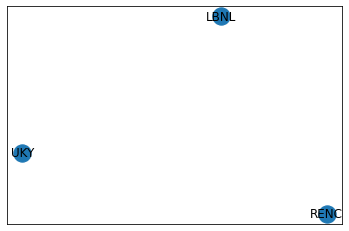

In [4]:
status, topology = slice_man.resources()
print("Status: {}\n".format(status))
print("Topology: {}".format(topology))

print()
print("Topology map: ")
topology.draw()

In [6]:
help(SliceManager)

Help on class SliceManager in module fabrictestbed.slice_manager.slice_manager:

class SliceManager(builtins.object)
 |  SliceManager(*, cm_host: str, oc_host: str, refresh_token: str, project_name: str = 'all', scope: str = 'all')
 |  
 |  Implements User facing Control Framework API interface
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *, cm_host: str, oc_host: str, refresh_token: str, project_name: str = 'all', scope: str = 'all')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create(self, *, slice_name: str, ssh_key: str, topology: fim.user.topology.ExperimentTopology = None, slice_graph: str = None, lease_end_time: str = None) -> Tuple[fabric_cf.orchestrator.orchestrator_proxy.Status, Union[Exception, List[fabric_cf.orchestrator.elements.reservation.Reservation]]]
 |      Create a slice
 |      @param slice_name slice name
 |      @param ssh_key SSH Key
 |      @param topology Experiment topology
 |      @param slice_graph Slice Graph st

#### Build slice

In [5]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, LinkType, Layer

experiment = ExperimentTopology()
slice_name = "NannaSlice"

help(ExperimentTopology)

Help on class ExperimentTopology in module fim.user.topology:

class ExperimentTopology(Topology)
 |  ExperimentTopology(graph_file: str = None, graph_string: str = None, logger=None)
 |  
 |  Define an user topology model, inheriting behavior from Topology class.
 |  In addition to publicly visible methods the following calls can be made:
 |  topology.nodes - a read-only dictionary of nodes in the topology
 |  topology.links - a read-only dictionary of links in the topology
 |  topology.interface_list - a read-only list of all interfaces of all nodes
 |  If you want to operate on top of a Neo4j graph, use the cast() method.
 |  
 |  Method resolution order:
 |      ExperimentTopology
 |      Topology
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph_file: str = None, graph_string: str = None, logger=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cast(self, *, asm_graph: fim.graph.slices.abc_asm.A

#### Add node1

In [8]:
experiment.remove_node('UKYNode2')
node1 = experiment.add_node(name='UKYNode2', site = 'UKY')

node1_capacities = Capacities()
node1_capacities.set_fields(core = 1, ram = 20, disk = 150)

node1.set_properties(capacities = node1_capacities, image_type='qcow2', image_ref='default_ubuntu_20')

node1_nvme = node1.add_component(ctype=ComponentType.NVME, model='P4510', name='n1_nvme')
node1_gpu  = node1.add_component(ctype=ComponentType.GPU, model='RTX6000', name='n1_gpu')
node1_nic = node1.add_component(ctype=ComponentType.SharedNIC, model='ConnectX-6', name='n1_nic')

#### Add node2

In [10]:
node2 = experiment.add_node(name='LBNLNode', site = 'LBL')

#capacities
node2_capacities = Capacities()
node2_capacities.set_fields(core = 2, ram = 15, disk = 80)

#properties
node2.set_properties(capacities = node2_capacities, image_type = 'qcow2', image_ref='default_ubuntu_20')

#components add
node2_gpu = node2.add_component(ctype=ComponentType.GPU, model='Tesla T4', name='n2_gpu')


#### Draw current nodes:

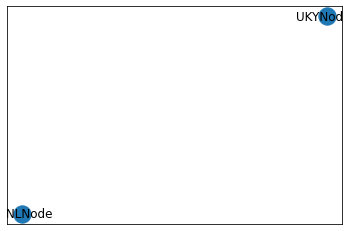

In [19]:
experiment.remove_node('UKYNode')
experiment.draw()

#### Create actual slice and request slice reservation

In [25]:
#serialize into slice graph object
slice_graph = experiment.serialize()

#communicate with orchestrator for slice
status,reservations = slice_man.create(slice_name = slice_name, slice_graph = slice_graph, ssh_key = ssh_key)

#get the slice id of the newly created slice and check status to see if it went through
slice_id = reservations[0].slice_id

print("Request {}".format(status))
print("Reservations: {}".format(reservations))


#get only slice from id and status
#request, state = slice_man.slice_status(slice_id)
#print("Slice status request {}".format(request))
#print("Slice status {}".format(state))


Request Status.OK
Reservations: [{
    "graph_node_id": "b421d8c8-ee38-49f5-b54c-f5a036f77287",
    "join_state": "None_",
    "lease_end": "2021-06-03 13:36:25",
    "reservation_id": "fa0eb56b-46d5-4402-a219-ca190d5f7439",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "0592fb93-cf84-43bf-86d8-6ae90952fca4"
}, {
    "graph_node_id": "5605e6c6-bc86-4549-b8a0-2fc474054b59",
    "join_state": "None_",
    "lease_end": "2021-06-03 13:36:25",
    "reservation_id": "8b3430e7-e843-4ec8-b91c-0e50b19be61d",
    "reservation_state": "Unknown",
    "resource_type": "VM",
    "slice_id": "0592fb93-cf84-43bf-86d8-6ae90952fca4"
}]
